In [118]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

import biff
from pygadgetreader import *
from octopus import profiles
from octopus import orbit_cm
from astropy import constants
from astropy import units as u

from octopus import profiles

In [119]:
font = {'size':16, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [120]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

4.51835939627e-39 kpc3 / (s2 solMass)


# To-do
1. Check 1.4 factor in the potential!
2. Play with more coefficients in $n, l, m$
3. Make 2d plots
4. Compare the value of the potential at a given positions

In [121]:
# Simulated data:

MW = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
MW_mass = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'mass', 'dm')
MW_pot = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pot', 'dm')

Returning DM    Positions
Returning DM    Mass
Returning DM    Potential


In [122]:
# Truncating the halo at 500kpc
trunc1 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<500)[0]


In [123]:
MW_t = MW[trunc1]
MW_mass_t = MW_mass[trunc1]
MW_pot_t = MW_pot[trunc1]

In [124]:
# Function to write the coefficients.
def writting_coeff(name, S, T):
    f = open(name, 'w')
    f.write("# S    T \n")
    S1d = np.reshape(S, (np.size(S),1))
    T1d = np.reshape(T, (np.size(T),1))
    for i in range(len(S1d)):
        f.write("%f %f \n"%(S1d[i][0], T1d[i][0]))
    f.close

In [125]:
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

# MW isolated halo (Hernquist)

In [126]:
r_MW_t = np.sqrt(MW_t[:,0]**2.0 + MW_t[:,1]**2.0 + MW_t[:,2]**2.0)
rho_teo = profiles.dens_hernquist(40.85, r_MW_t, 1.55E12) 

In [127]:
## MW isolated halo 1 term in N

SMW1, TMW1, nlmsMW1 = STnlm(MW_t, MW_mass_t, 40.3, 1, 0)
MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.55E12, 40.85)


In [128]:
## MW isolated halo 10 term in N

SMW2, TMW2, nlmsMW2 = STnlm(MW_t, MW_mass_t, 40.3, 10, 0)
MWbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, 1.55E12, 40.85)

In [129]:
## MW isolated halo 20 term in N

SMW3, TMW3, nlmsMW3 = STnlm(MW_t, MW_mass_t, 40.3, 20, 0)
MWbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1.55E12, 40.85)

In [132]:
## MW isolated halo 5 term in Nmax and 5 in lmax

SMW4, TMW4, nlmsMW4 = STnlm(MW_t, MW_mass_t, 40.3, 5, 5)
MWbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, G_c.value, 1.55E12, 40.85)
MWbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, 1.55E12, 40.85)

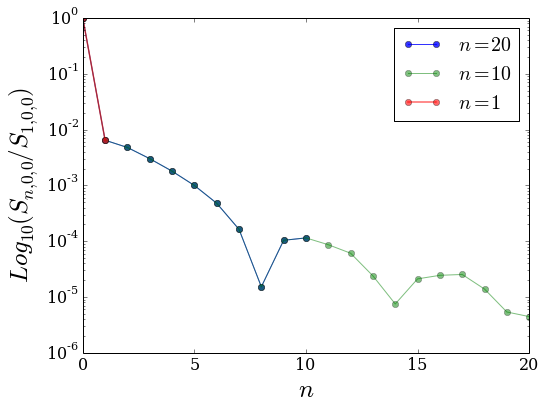

In [136]:
plt.figure(figsize=(8,6))
plt.semilogy(np.array(nlmsMW2)[:,0], np.abs(SMW2.flat/SMW2[0,0,0])[:], marker='o', c='b', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmsMW3)[:,0], np.abs(SMW3.flat/SMW3[0,0,0])[:], marker='o', c='g', alpha=0.5, label='$n=10$')
plt.semilogy(np.array(nlmsMW1)[:,0], np.abs(SMW1.flat/SMW1[0,0,0])[:], marker='o', c='r', lw=1.5, alpha=0.6, label='$n=1$')
plt.xlabel(r'$n$', fontsize=25)
plt.ylabel(r'$Log_{10}(S_{n,0,0}/S_{1,0,0})$', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.savefig("Snlm_MW.eps", dpi=300)
#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)

In [139]:
factor=1.45

residuals1 = np.zeros((len(r_MW_t), 2))
residuals2 = np.zeros((len(r_MW_t), 2))
residuals3 = np.zeros((len(r_MW_t), 2))
residuals4 = np.zeros((len(r_MW_t), 2))

residuals1[:,0] = r_MW_t
residuals2[:,0] = r_MW_t
residuals3[:,0] = r_MW_t
residuals4[:,0] = r_MW_t

residuals1[:,1] = (MWbfe_rho - (rho_teo*factor))/rho_teo*factor
residuals2[:,1] = (MWbfe_rho2 - (rho_teo*factor))/rho_teo*factor
residuals3[:,1] = (MWbfe_rho3 - (rho_teo*factor))/rho_teo*factor
residuals4[:,1] = (MWbfe_rho4 - (rho_teo*factor))/rho_teo*factor

res_sorted1 = np.sort(residuals1, axis=0)
res_sorted2 = np.sort(residuals2, axis=0)
res_sorted3 = np.sort(residuals3, axis=0)
res_sorted4 = np.sort(residuals4, axis=0)



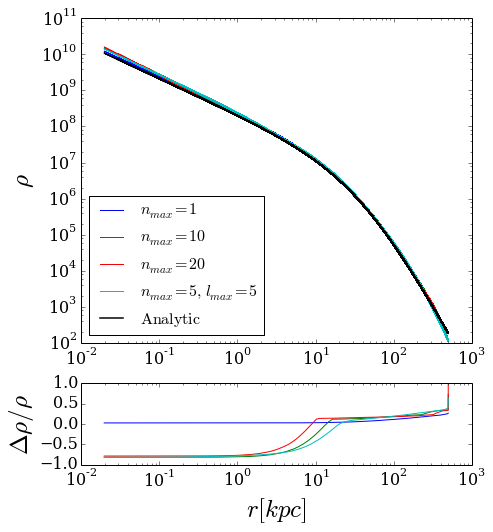

In [140]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[14, 8])
gs = gridspec.GridSpec(2, 1, width_ratios=[1,1], height_ratios=[4,1])

ax1 = plt.subplot(gs[0])
ax1.loglog(r_MW_t, MWbfe_rho, label='$n_{max} = 1$')
ax1.loglog(r_MW_t, MWbfe_rho2, label='$n_{max} = 10$')
ax1.loglog(r_MW_t, MWbfe_rho3, label='$n_{max} = 20$')
ax1.loglog(r_MW_t, MWbfe_rho4, label='$n_{max} = 5,\ l_{max}=5$')
ax1.loglog(r_MW_t, rho_teo*factor, label='$\mathrm{Analytic}$', lw=1.5, c='k')
ax1.legend(fontsize=16, loc='best')
ax1.set_ylabel(r'$\rho$', fontsize=25)

ax2 = plt.subplot(gs[1])
ax2.semilogx(res_sorted1[:,0], res_sorted1[:,1])
ax2.semilogx(res_sorted2[:,0], res_sorted2[:,1])
ax2.semilogx(res_sorted3[:,0], res_sorted3[:,1])
ax2.semilogx(res_sorted4[:,0], res_sorted4[:,1])
ax2.set_xlabel(r'$r[kpc]$', fontsize=25)
ax2.set_ylabel(r'$\Delta \rho / \rho$', fontsize=25)

#plt.savefig('rho_MW.eps', dpi=300)

In [16]:
r = np.linspace(0.1, 500, 1000)
hernpot = profiles.pot_hernquist(40.85, r, 1.55E12)
disk_pot = profiles.pot_mn(0.638, 2.9,r, 0, 0, 5.78E10)
bulge_pot = profiles.pot_hernquist(0.7, r, 1.4E10)

bulge_pot_hex = profiles.pot_hernquist(0.7, r_MW_t, 1.4E10)
disk_pot_hex = profiles.pot_mn(0.638, 2.9,r_MW_t, 0, 0, 5.78E10)



In [17]:
pot_factor = G_c/43007.1*1E10 

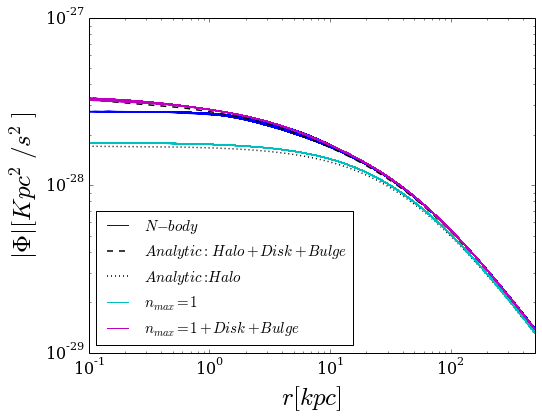

In [169]:
plt.figure(figsize=(8,6))
plt.loglog(r_MW_t, np.abs(MW_pot_t)*pot_factor, label='$N-body$')
plt.loglog(r, np.abs(hernpot + disk_pot + bulge_pot), label='$Analytic:\ Halo + Disk + Bulge$', lw=1.5, ls='--', c='k')
plt.loglog(r, np.abs(hernpot), label='$Analytic: Halo$', lw=1.5, ls=':', c='k')
plt.loglog(r_MW_t, np.abs(MWbfe_pot/1.5), label='$n_{max} = 1$')
plt.loglog(r_MW_t, np.abs(MWbfe_pot/1.5 + bulge_pot_hex + disk_pot_hex), label='$n_{max} = 1 + Disk + Bulge$')
#plt.loglog(r_MW_t, np.abs(MWbfe_pot3), label='$n_{max} = 20$')
#plt.loglog(r_MW_t, np.abs(MWbfe_pot4), label='$n_{max} = 5, l_{max}=5$')
plt.xlim(0.1, 500)

plt.legend(fontsize=15, loc='best')
plt.xlabel(r'$r[kpc]$', fontsize=25)
plt.ylabel(r'$|\Phi|[Kpc^2/s^2]$', fontsize=25)

## Conclusions from the above plot:

1. N-body potential of DM particles, feel the potential of the disk + buge (blue line)
2. HEX potential doesn't account for disk and bulge. I am going to use the analytic forms of this potentials as a first approx.
3. There is a factor of ~1.45 between the HEX potential and N-body!!!

In [141]:
def potential_residuals(pot_nbody, pot_hex):
    pot_factor = G_c/43007.1*1E10 
    pot_nbody = pot_nbody * pot_factor.value
    # Analytic Disk & Bulge potentials 
    bulge_pot_hex = profiles.pot_hernquist(0.7, r_MW_t, 1.4E10)
    disk_pot_hex = profiles.pot_mn(0.638, 2.9,r_MW_t, 0, 0, 5.78E10)
    pot_hex = pot_hex/1.5 + bulge_pot_hex + disk_pot_hex
    pot_res = (pot_hex - pot_nbody) / pot_nbody
    return pot_res

In [142]:
MW_pot1d = np.reshape(MW_pot_t, (len(MW_pot_t), 1))

<matplotlib.colorbar.Colorbar instance at 0x7f619dfdc908>

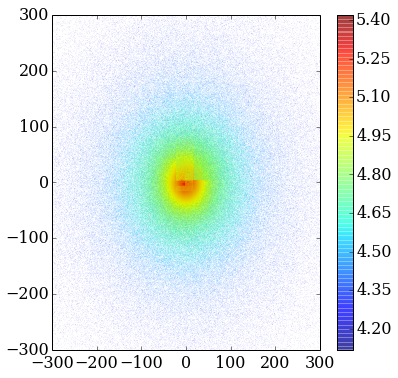

In [143]:
plt.figure(figsize=(6,6))
plt.scatter(MW_t[:,0], MW_t[:,1], s=0.1, edgecolors='none', c=np.log10(np.abs(MW_pot1d)), alpha=0.5)
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.colorbar()

In [153]:
test_residuals = potential_residuals(MW_pot_t, MWbfe_pot)
pot_res_cut = np.where(np.abs(test_residuals)<0.05)[0]
pot_res_cut_h = np.where(test_residuals>0.05)[0]

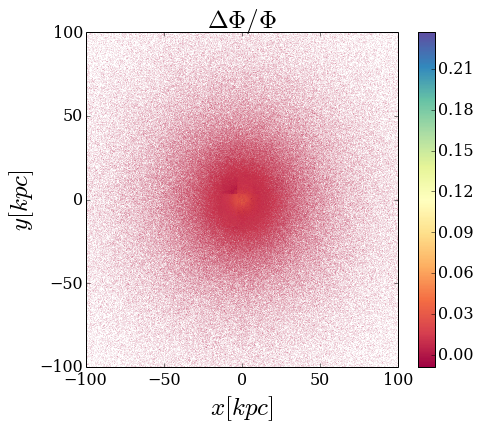

In [144]:
cm = plt.cm.get_cmap('Spectral')
plt.figure(figsize=(7,6))
cs = plt.scatter(MW_t[:,0], MW_t[:,1], c=test_residuals[:], vmin=min(test_residuals),
                 vmax=max(test_residuals), cmap=cm, s=0.1, edgecolors='none')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.colorbar(cs)
plt.xlabel(r'$x[kpc]$', fontsize=25)
plt.ylabel(r'$y[kpc]$', fontsize=25)
plt.title(r'$\Delta \Phi / \Phi$', fontsize=25)

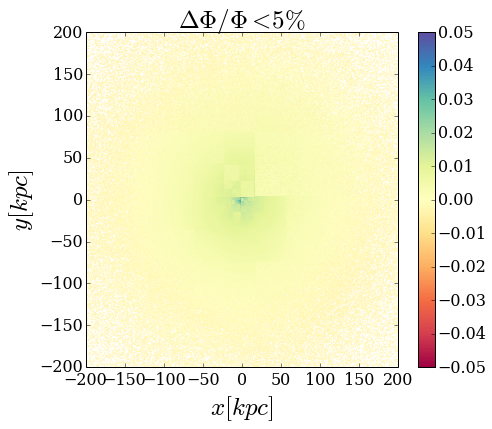

In [167]:
cm = plt.cm.get_cmap('Spectral')
plt.figure(figsize=(7,6))
cs = plt.scatter(MW_t[pot_res_cut,0], MW_t[pot_res_cut,1], c=test_residuals[pot_res_cut], vmin=-0.05,
                 vmax=0.05, cmap=cm, s=1, edgecolors='none')
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.colorbar(cs)
plt.xlabel(r'$x[kpc]$', fontsize=25)
plt.ylabel(r'$y[kpc]$', fontsize=25)
plt.title(r'$\Delta \Phi / \Phi < 5 \%$', fontsize=25)

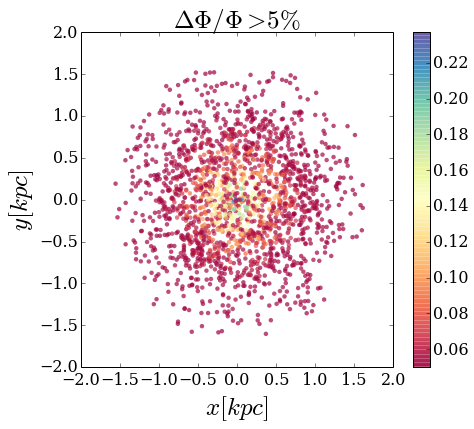

In [165]:
cm = plt.cm.get_cmap('Spectral')
plt.figure(figsize=(7,6))
cs = plt.scatter(MW_t[pot_res_cut_h,0], MW_t[pot_res_cut_h,1], c=test_residuals[pot_res_cut_h], vmin=0.05,
                 vmax=max(test_residuals), cmap=cm, s=20, edgecolors='none', alpha=0.7)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar(cs)
plt.xlabel(r'$x[kpc]$', fontsize=25)
plt.ylabel(r'$y[kpc]$', fontsize=25)
plt.title(r'$\Delta \Phi / \Phi > 5 \%$', fontsize=25)